# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statistics
from geopy.distance import geodesic

from sklearn.model_selection import train_test_split,cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder,StandardScaler 
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

# Load & Understand Data

In [2]:
df_train = pd.read_csv('d:\\mlops_project\\MLops_project\\data\\train.csv')
df_train.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30


In [3]:
df_train.columns

Index(['ID', 'Delivery_person_ID', 'Delivery_person_Age',
       'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Order_Date', 'Time_Orderd',
       'Time_Order_picked', 'Weatherconditions', 'Road_traffic_density',
       'Vehicle_condition', 'Type_of_order', 'Type_of_vehicle',
       'multiple_deliveries', 'Festival', 'City', 'Time_taken(min)'],
      dtype='object')

In [4]:
print("Train Dataset :", df_train.shape)

Train Dataset : (45593, 20)


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          45593 non-null  object 
 3   Delivery_person_Ratings      45593 non-null  object 
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Order_Date                   45593 non-null  object 
 9   Time_Orderd                  45593 non-null  object 
 10  Time_Order_picked            45593 non-null  object 
 11  Weatherconditions            45593 non-null  object 
 12  Road_traffic_density         45593 non-null  object 
 13  Vehicle_conditio

In [6]:
#Check statistical values for fields with numerical datatype
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Restaurant_latitude,45593.0,17.017729,8.185109,-30.905562,12.933284,18.546947,22.728163,30.914057
Restaurant_longitude,45593.0,70.231332,22.883647,-88.366217,73.170000,75.898497,78.044095,88.433452
Delivery_location_latitude,45593.0,17.465186,7.335122,0.010000,12.988453,18.633934,22.785049,31.054057
Delivery_location_longitude,45593.0,70.845702,21.118812,0.010000,73.280000,76.002574,78.107044,88.563452
Vehicle_condition,45593.0,1.023359,0.839065,0.000000,0.000000,1.000000,2.000000,3.000000


In [7]:
#Check statistical values for fields with other than numerical datatype
df_train.describe(exclude=np.number).T

,count,unique,top,freq
ID,45593,45593,0x5fb2,1
Delivery_person_ID,45593,1320,PUNERES01DEL01,67
Delivery_person_Age,45593,23,35,2262
Delivery_person_Ratings,45593,29,4.8,7148
Order_Date,45593,44,15-03-2022,1192
Time_Orderd,45593,177,NaN,1731
Time_Order_picked,45593,193,21:30:00,496
Weatherconditions,45593,7,conditions Fog,7654
Road_traffic_density,45593,5,Low,15477
Type_of_order,45593,4,Snack,11533


**Observations:**
1. There are null values present in Time_Orderd column.
2. Data Formatting will be required for Weatherconditions & Time_taken(min) column.
2. Both numerical & categorical features are present.
3. ID & Delivery_person_ID will not be used to build the model. 

# Data Cleaning

In [8]:
#Update Column Names
def update_column_name(df):
    #Renaming Weatherconditions column
    df.rename(columns={'Weatherconditions': 'Weather_conditions'},inplace=True)
    
update_column_name(df_train)
print(df_train.columns)

Index(['ID', 'Delivery_person_ID', 'Delivery_person_Age',
       'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Order_Date', 'Time_Orderd',
       'Time_Order_picked', 'Weather_conditions', 'Road_traffic_density',
       'Vehicle_condition', 'Type_of_order', 'Type_of_vehicle',
       'multiple_deliveries', 'Festival', 'City', 'Time_taken(min)'],
      dtype='object')


In [9]:
#Extract relevant values from column
def extract_column_value(df):
    #Extract time and convert to int
    df['Time_taken(min)'] = df['Time_taken(min)'].apply(lambda x: int(x.split(' ')[1].strip()))
    #Extract Weather conditions
    df['Weather_conditions'] = df['Weather_conditions'].apply(lambda x: x.split(' ')[1].strip())
    #Extract city code from Delivery person ID
    df['City_code']=df['Delivery_person_ID'].str.split("RES", expand=True)[0]
    
extract_column_value(df_train)
df_train[['Time_taken(min)','Weather_conditions','City_code']].head()

,Time_taken(min),Weather_conditions,City_code
0,24,Sunny,INDO
1,33,Stormy,BANG
2,26,Sandstorms,BANG
3,21,Sunny,COIMB
4,30,Cloudy,CHEN


In [10]:
#Drop Columns which won't be use for building model
def drop_columns(df):
    df.drop(['ID','Delivery_person_ID'],axis=1,inplace=True)
    
print("Before No. of columns: ",df_train.shape[1])
drop_columns(df_train)
print("After No. of columns: ",df_train.shape[1])

Before No. of columns:  21
After No. of columns:  19


In [11]:
#Check for Duplicate Values
if (len(df_train[df_train.duplicated()])>0):
    print("There are Duplicate values present")
else:
    print("There is no duplicate value present")

There is no duplicate value present


In [12]:
df_train.columns

Index(['Delivery_person_Age', 'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Order_Date', 'Time_Orderd',
       'Time_Order_picked', 'Weather_conditions', 'Road_traffic_density',
       'Vehicle_condition', 'Type_of_order', 'Type_of_vehicle',
       'multiple_deliveries', 'Festival', 'City', 'Time_taken(min)',
       'City_code'],
      dtype='object')

In [13]:
#Update datatypes
def update_datatype(df):
    df['Delivery_person_Age'] = df['Delivery_person_Age'].astype('float64')
    df['Delivery_person_Ratings'] = df['Delivery_person_Ratings'].astype('float64')
    df['multiple_deliveries'] = df['multiple_deliveries'].astype('float64')
    
update_datatype(df_train)

In [14]:
#Convert String 'NaN' to np.nan
def convert_nan(df):
    df.replace('NaN', float(np.nan), regex=True,inplace=True)

convert_nan(df_train)

In [15]:
df_train=df_train[list(set(list(df_train))-set(list(df_train.select_dtypes(include='object').columns)))]

In [16]:
df_train.columns

Index(['multiple_deliveries', 'Vehicle_condition',
       'Delivery_location_latitude', 'Time_taken(min)',
       'Delivery_location_longitude', 'Restaurant_longitude',
       'Delivery_person_Age', 'Restaurant_latitude',
       'Delivery_person_Ratings'],
      dtype='object')

In [17]:
#Check null values
df_train.isnull().sum().sort_values(ascending=False)

Delivery_person_Ratings        1908
Delivery_person_Age            1854
multiple_deliveries             993
Vehicle_condition                 0
Delivery_location_latitude        0
Delivery_location_longitude       0
Time_taken(min)                   0
Restaurant_longitude              0
Restaurant_latitude               0
dtype: int64

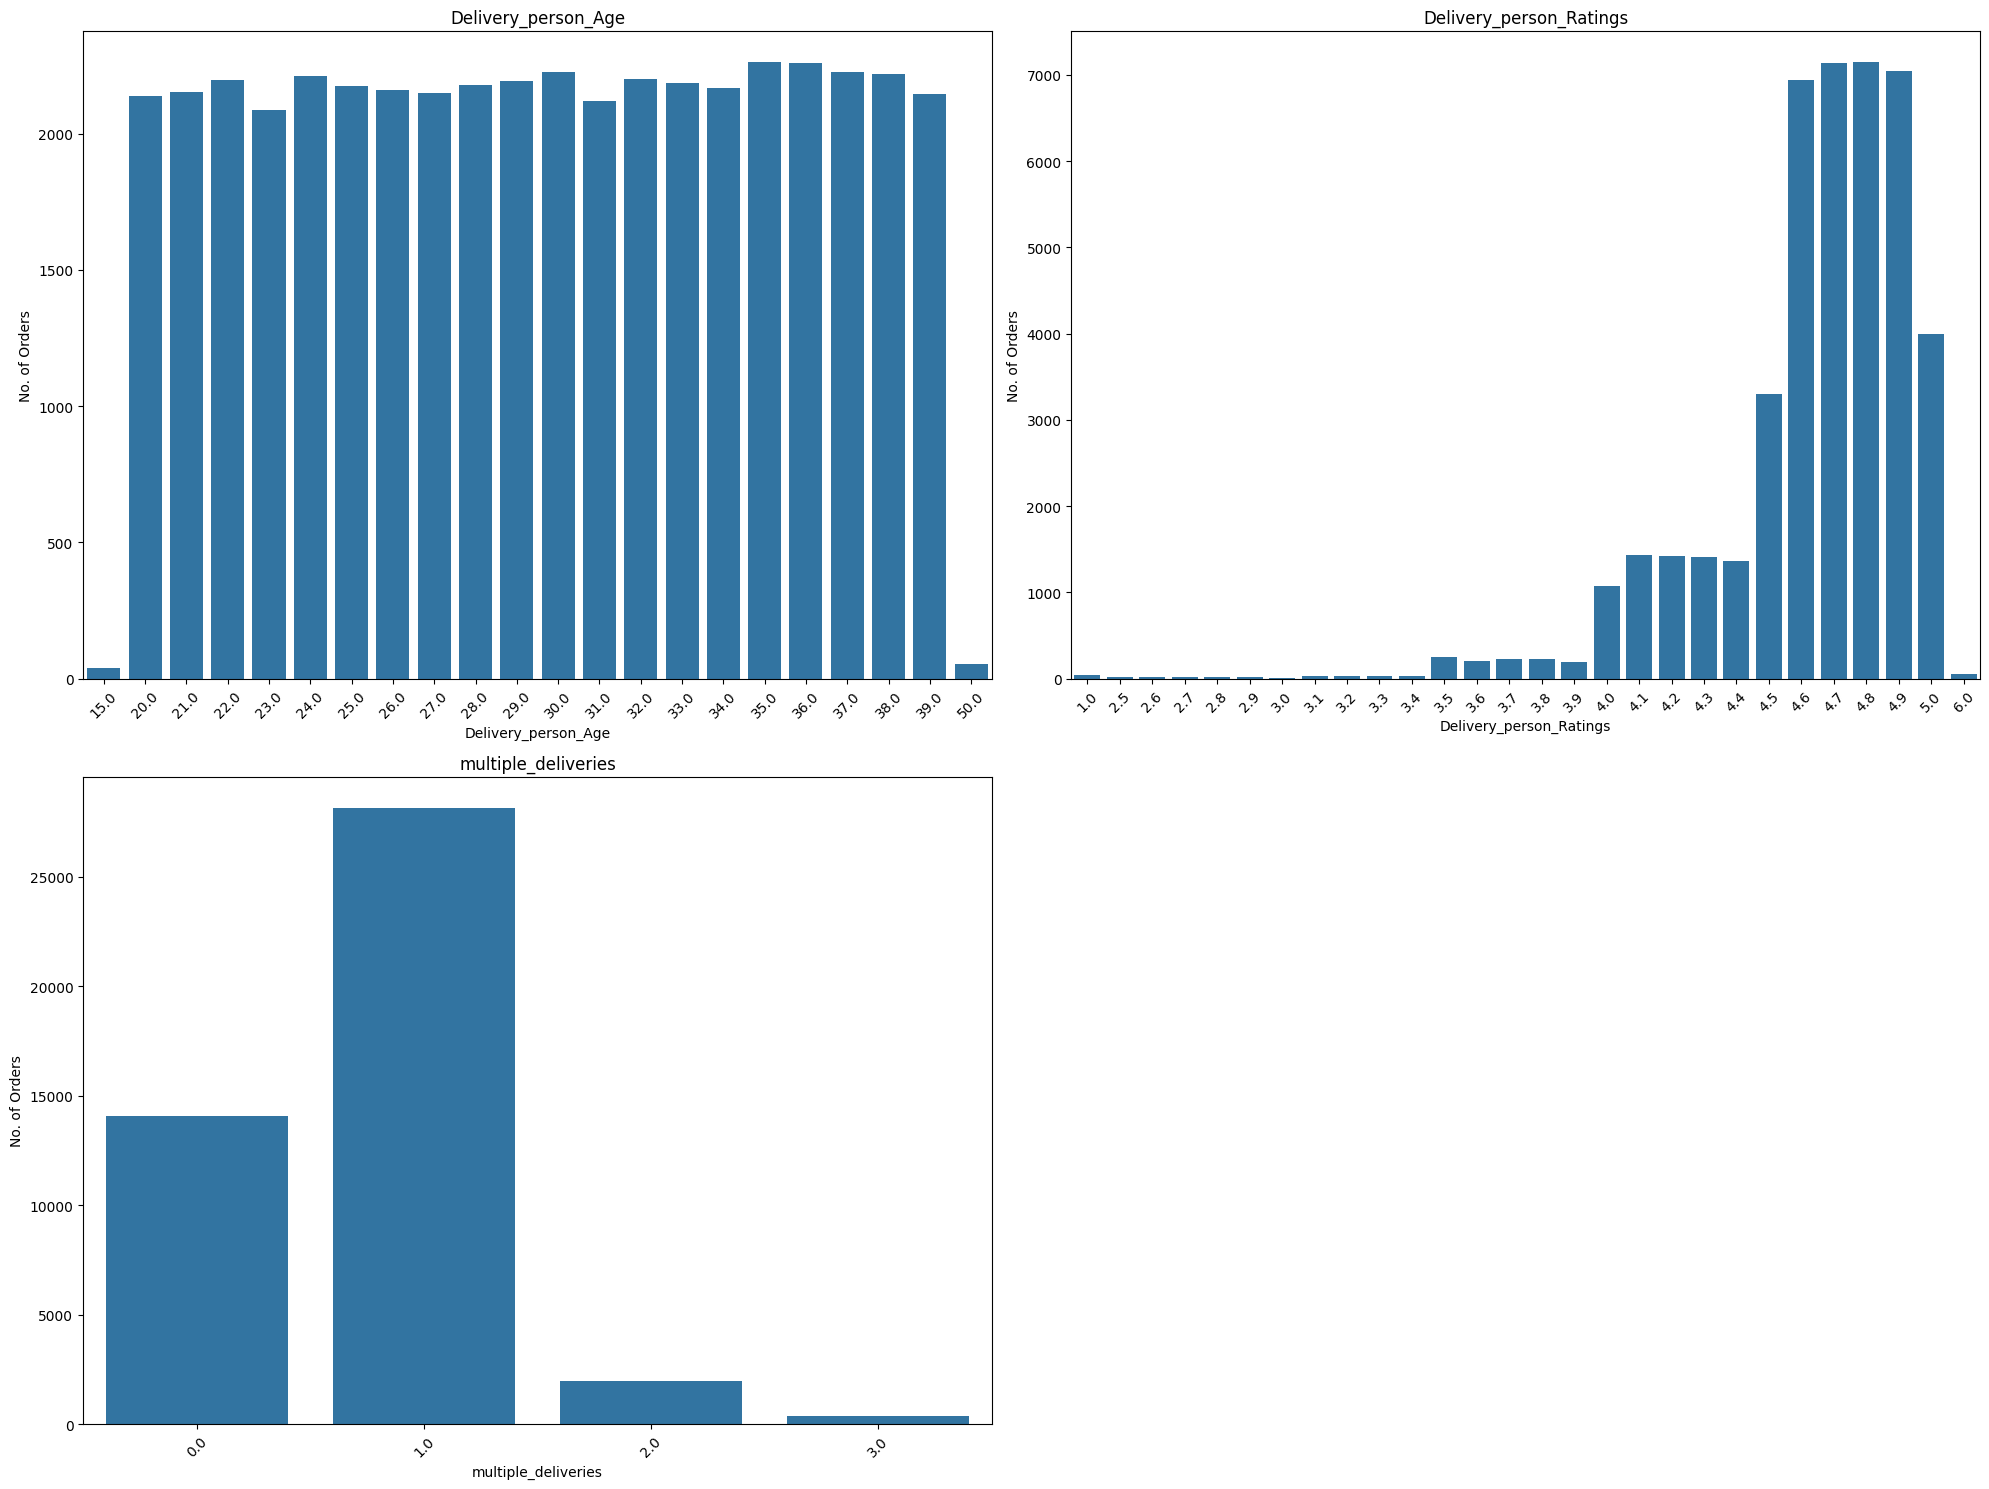

In [18]:
#Let's explore columns that have null values
cols = ['Delivery_person_Age','Delivery_person_Ratings','multiple_deliveries']
num_plots = len(cols)
num_rows = (num_plots // 2) + (num_plots % 2)

fig, axes = plt.subplots(num_rows, 2, figsize=(20,15))

for i, column_name in enumerate(cols):
    row = i // 2
    col = i % 2

    ax = axes[row, col]
    sns.countplot(data=df_train, x=column_name, order=df_train[column_name].value_counts().sort_index().index, ax=ax)

    ax.set_xlabel(column_name)
    ax.set_ylabel('No. of Orders')
    ax.set_title(column_name)
    ax.tick_params(axis='x', rotation=45)
    
if num_plots % 2 != 0:
    fig.delaxes(axes[-1, -1])

plt.tight_layout()
plt.show()

In [19]:
#Handle null values
def handle_null_values(df):
    df['Delivery_person_Age'].fillna(df['Delivery_person_Age'].median(), inplace=True)
    df['multiple_deliveries'].fillna(df['multiple_deliveries'].mode()[0], inplace=True)
    df['Delivery_person_Ratings'].fillna(df['Delivery_person_Ratings'].median(), inplace=True)
    
handle_null_values(df_train)
df_train.isnull().sum()

multiple_deliveries            0
Vehicle_condition              0
Delivery_location_latitude     0
Time_taken(min)                0
Delivery_location_longitude    0
Restaurant_longitude           0
Delivery_person_Age            0
Restaurant_latitude            0
Delivery_person_Ratings        0
dtype: int64

In [20]:
df_train.columns

Index(['multiple_deliveries', 'Vehicle_condition',
       'Delivery_location_latitude', 'Time_taken(min)',
       'Delivery_location_longitude', 'Restaurant_longitude',
       'Delivery_person_Age', 'Restaurant_latitude',
       'Delivery_person_Ratings'],
      dtype='object')

In [21]:
df_train.dtypes

multiple_deliveries            float64
Vehicle_condition                int64
Delivery_location_latitude     float64
Time_taken(min)                  int64
Delivery_location_longitude    float64
Restaurant_longitude           float64
Delivery_person_Age            float64
Restaurant_latitude            float64
Delivery_person_Ratings        float64
dtype: object

## Train test split

In [22]:
#Split features & label
X = df_train.drop('Time_taken(min)', axis=1)  # Features
y = df_train['Time_taken(min)']  # Target variable

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(36474, 8)
(36474,)
(9119, 8)
(9119,)


# Model Building

In [23]:
import xgboost as xgb

### Model Building

In [24]:
# Create a XGB regressor model
model = xgb.XGBRegressor(n_estimators=20,max_depth=9)

# Fit the model on the training data
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=9, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=20, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

### Model Evaluation

In [25]:
# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", round(mae,2))
print("Mean Squared Error (MSE):", round(mse,2))
print("Root Mean Squared Error (RMSE):", round(rmse,2))
print("R-squared (R2) Score:", round(r2,2))

Mean Absolute Error (MAE): 5.25
Mean Squared Error (MSE): 44.04
Root Mean Squared Error (RMSE): 6.64
R-squared (R2) Score: 0.5


In [26]:
import pickle
pickle_out = open("final_model.pkl","wb")
pickle.dump(model, pickle_out)
pickle_out.close()

In [27]:
df_train.columns

Index(['multiple_deliveries', 'Vehicle_condition',
       'Delivery_location_latitude', 'Time_taken(min)',
       'Delivery_location_longitude', 'Restaurant_longitude',
       'Delivery_person_Age', 'Restaurant_latitude',
       'Delivery_person_Ratings'],
      dtype='object')